In [3]:
%matplotlib inline
import os.path
from ipynb.fs.defs.utilities import *

# Estimation of the available magnetic field of an electromagnetic navigation system.

Computation of available fields in one position is performed inspired by the approach proposed in [Bouchard 2008](https://asmedigitalcollection.asme.org/mechanismsrobotics/article/2/1/011010/475593/On-the-Ability-of-a-Cable-Driven-Robot-to-Generate) to compute available wrench set for a cable driven parallel robot using zonotopes.

A zonotope is a convex polyhedron in a high dimensions; it can be used here to represent the set of magnetic fields that can be generated by an eMNS.

## Functions for the convex hull computation of a zonotope

In [4]:
#Compute the vertices of the convex hull defining the zonotope
def ComputeZonotopeVertices(position,Imin,Imax,J):

    N = np.shape(J)[1]
    pts = np.stack(([0,1],)*N,0)
    A_alpha = np.transpose((np.array(np.meshgrid(*pts)).T).reshape(2**N,N)) #compute permutation matrix
    
    M = np.matmul(J,(Imax - Imin)*np.eye(N))
    C = np.matmul(M,A_alpha)
    
    hull = ConvexHull(np.transpose(C))
    hull_idx = hull.vertices
    C_hull = C[:,hull_idx]
    
    vert = np.transpose(C_hull + np.matmul(J,Imin*np.ones((N,1))))

    return vert

## Application to the CardioMag eMNS

The shape of the available field for the CardioMag eMNS is a polyhedron with 8 pairs of parallel faces : as the number of coils (dimension of the actuator space) is superior to the dimension of the field, the zonotope include some of the extreme currents configurations (see [Bouchard 2008](https://asmedigitalcollection.asme.org/mechanismsrobotics/article/2/1/011010/475593/On-the-Ability-of-a-Cable-Driven-Robot-to-Generate) ).

In [5]:
# Load systems calibration
cal_path_cmag = os.path.join('models/', 'C_Mag_Calibration_06-25-2015_no_offset.yaml')
model_cmag = ForwardModelMPEM()
model_cmag.setCalibrationFile(cal_path_cmag)

### Estimation at a central position

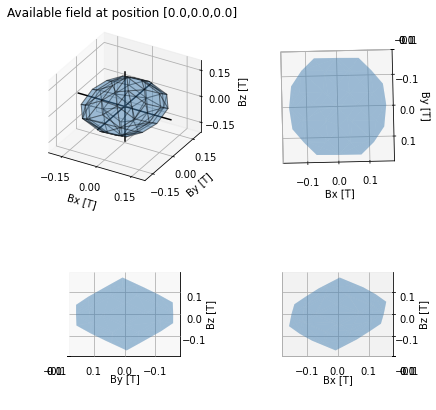

In [6]:
lim = 0.2
Imin = -20
Imax = 20

VecStart_x = [-lim,0.,0.]
VecStart_y = [0.,-lim,0.]
VecStart_z = [0.,0.,-lim]

VecEnd_x = [lim,0.,0.]
VecEnd_y = [0.,lim,0.]
VecEnd_z  =[0.,0.,lim]

position = np.array([0.0,0.0,0.0])
J = model_cmag.getFieldActuationMatrix(position)


fig = plt.figure(figsize=(7, 7))

#3d views
ax = fig.add_subplot(221,projection='3d', proj_type = 'ortho')
plotHull(ax,ComputeZonotopeVertices(position,Imin,Imax,J),'steelblue',0.3,inter=0.1,edge_color='black')
ax.plot([-lim,lim], [0.,0.], [0.,0.],color='black')
ax.plot([0.,0.],[-lim,lim],  [0.,0.],color='black')
ax.plot([0.,0.],[0.,0.],[-lim,lim],color='black')
ax.set_xlabel('Bx [T]')
ax.set_ylabel('By [T]')
ax.set_zlabel('Bz [T]')
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_zlim(-lim, lim)

ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.yaxis.set_major_locator(plt.MaxNLocator(3))
ax.zaxis.set_major_locator(plt.MaxNLocator(3))
ax.set_title('Available field at position [0.0,0.0,0.0]')

#Projections
ax = fig.add_subplot(222,projection='3d', proj_type = 'ortho',azim=-90,elev=-90)
plotHull(ax,ComputeZonotopeVertices(position,Imin,Imax,J),'steelblue',0.3,inter=0.1,set_edges=False)
ax.set_xlabel('Bx [T]')
ax.set_ylabel('By [T]')

ax = fig.add_subplot(223,projection='3d', proj_type = 'ortho',azim=180,elev=0)
plotHull(ax,ComputeZonotopeVertices(position,Imin,Imax,J),'steelblue',0.3,inter=0.1,set_edges=False)

ax.set_ylabel('By [T]')
ax.set_zlabel('Bz [T]')

ax = fig.add_subplot(224,projection='3d', proj_type = 'ortho',azim=-90,elev=0)
plotHull(ax,ComputeZonotopeVertices(position,Imin,Imax,J),'steelblue',0.3,inter=0.1,set_edges=False)
ax.set_xlabel('Bx [T]')
ax.set_zlabel('Bz [T]')


plt.show()

### Estimation at other positions

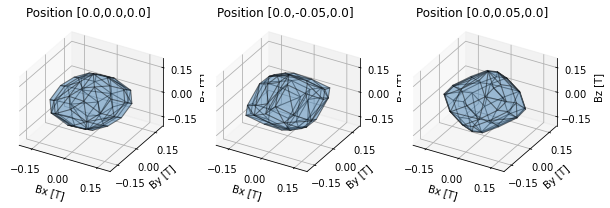

In [7]:
fig = plt.figure(figsize=(10, 3))

lim = 0.2

position = np.array([0.0,0.0,0.])
J = model_cmag.getFieldActuationMatrix(position)


ax = fig.add_subplot(131,projection='3d', proj_type = 'ortho')
plotHull(ax,ComputeZonotopeVertices(position,-20,20,J),'steelblue',0.3,inter=0.1,edge_color='black')
ax.set_xlabel('Bx [T]')
ax.set_ylabel('By [T]')
ax.set_zlabel('Bz [T]')
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_zlim(-lim, lim)
ax.set_title('Position [0.0,0.0,0.0]')


ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.yaxis.set_major_locator(plt.MaxNLocator(3))
ax.zaxis.set_major_locator(plt.MaxNLocator(3))


position = np.array([0.,-0.05,0.])
J = model_cmag.getFieldActuationMatrix(position)


ax = fig.add_subplot(132,projection='3d', proj_type = 'ortho')
plotHull(ax,ComputeZonotopeVertices(position,-20,20,J),'steelblue',0.3,inter=0.1,edge_color='black')
ax.set_xlabel('Bx [T]')
ax.set_ylabel('By [T]')
ax.set_zlabel('Bz [T]')
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_zlim(-lim, lim)
ax.set_title('Position [0.0,-0.05,0.0]')


ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.yaxis.set_major_locator(plt.MaxNLocator(3))
ax.zaxis.set_major_locator(plt.MaxNLocator(3))


position = np.array([0.,0.05,0.])
J = model_cmag.getFieldActuationMatrix(position)


ax = fig.add_subplot(133,projection='3d', proj_type = 'ortho')
plotHull(ax,ComputeZonotopeVertices(position,-20,20,J),'steelblue',0.3,inter=0.1,edge_color='black')
ax.set_xlabel('Bx [T]')
ax.set_ylabel('By [T]')
ax.set_zlabel('Bz [T]')
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_zlim(-lim, lim)
ax.set_title('Position [0.0,0.05,0.0]')

ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.yaxis.set_major_locator(plt.MaxNLocator(3))
ax.zaxis.set_major_locator(plt.MaxNLocator(3))

plt.show()